# House Price Prediction with Linear Regression and XGBoost

## 1. About the Data
Data source from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). Challenges in this dataset are:
1. There are missing values.
2. There are a lot of features in numeric and categorical.

For missing value, the columns that contain missing value more than 5% will be dropped. Meanwhile for numerical features, the missing values will be imputed by using the median. In other hand, the missing values in categorical features will be imputed by the most frequent. 

For linear regression, the VIF score will be used to do the feature selection. The features with VIF score > 5 will be dropped (because it contains the multicollinearity). Meanwhile for categorical features will be used the Cramer's V.

## 2. Drop Features and Imputation

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

In [2]:
house = pd.read_csv("./data/train.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Drop column that empty rows more than 5%
# Set threshold = 0.05
threshold = 0.05

# Find ratio of missing values per column
missing_ratio = house.isnull().mean()

# Drop columns where missing % > threshold
house_cleaned = house.drop(columns=missing_ratio[missing_ratio > threshold].index)

print("Dropped columns:", missing_ratio[missing_ratio > threshold].index.tolist())
house_cleaned.head()

Dropped columns: ['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [4]:
# Do the imputation

import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Replace Python None with np.nan
house_cleaned = house_cleaned.replace({None: np.nan})

# Identify numerical and categorical columns
num_cols = house_cleaned.select_dtypes(include=["number"]).columns
cat_cols = house_cleaned.select_dtypes(exclude=["number"]).columns

# Define imputers
num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

# Build column transformer
preprocessor_imputer = ColumnTransformer(
    transformers=[
        ("num", num_imputer, num_cols),
        ("cat", cat_imputer, cat_cols)
    ]
).set_output(transform="pandas")

# Create pipeline
pipeline_imputer = Pipeline(steps=[("preprocessor", preprocessor_imputer)]).set_output(transform="pandas")

# Fit and transform
house_imputed = pipeline_imputer.fit_transform(house_cleaned)

## 3. Heatmap for Numerical Features

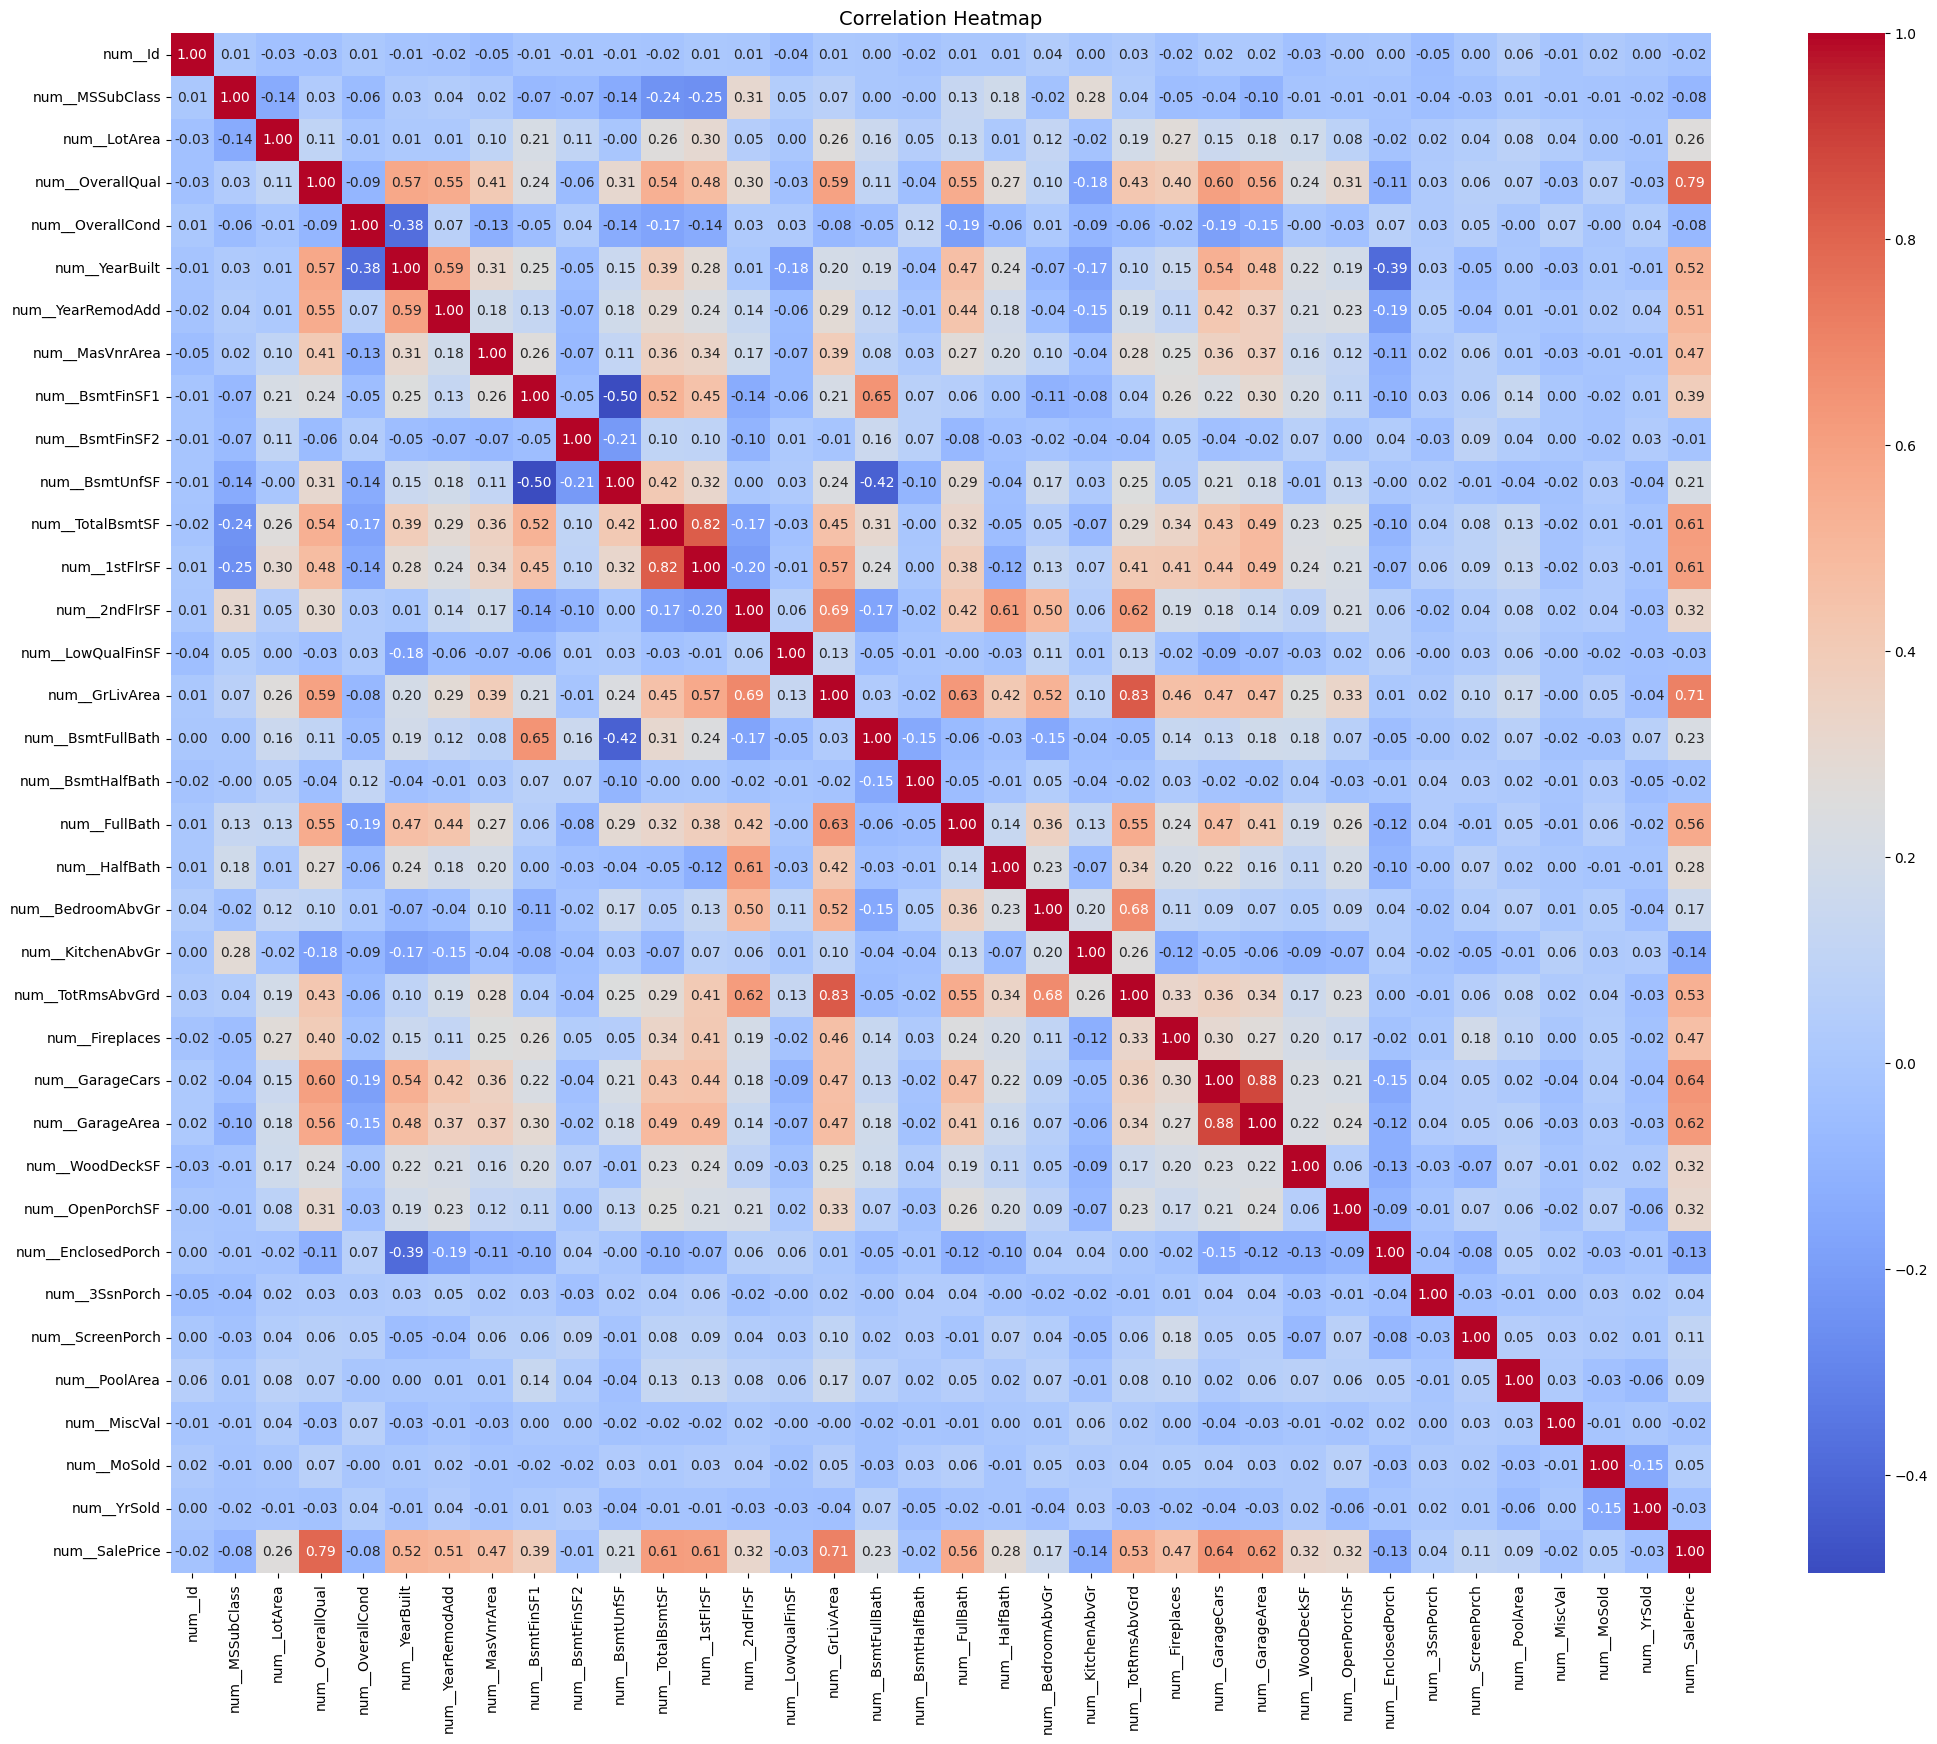

In [5]:
# Check correlation with heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns only
num_house_imputed = house_imputed.select_dtypes(include=["number"])

# Compute correlation
corr = num_house_imputed.corr()

# Plot heatmap
plt.figure(figsize=(25,20))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

In [6]:
num_house_imputed.columns

Index(['num__Id', 'num__MSSubClass', 'num__LotArea', 'num__OverallQual',
       'num__OverallCond', 'num__YearBuilt', 'num__YearRemodAdd',
       'num__MasVnrArea', 'num__BsmtFinSF1', 'num__BsmtFinSF2',
       'num__BsmtUnfSF', 'num__TotalBsmtSF', 'num__1stFlrSF', 'num__2ndFlrSF',
       'num__LowQualFinSF', 'num__GrLivArea', 'num__BsmtFullBath',
       'num__BsmtHalfBath', 'num__FullBath', 'num__HalfBath',
       'num__BedroomAbvGr', 'num__KitchenAbvGr', 'num__TotRmsAbvGrd',
       'num__Fireplaces', 'num__GarageCars', 'num__GarageArea',
       'num__WoodDeckSF', 'num__OpenPorchSF', 'num__EnclosedPorch',
       'num__3SsnPorch', 'num__ScreenPorch', 'num__PoolArea', 'num__MiscVal',
       'num__MoSold', 'num__YrSold', 'num__SalePrice'],
      dtype='object')

## 4. Linear Regression for Features with high Correlation to SalePrice

In [7]:
data_sample = house_imputed[['num__OverallQual','num__YearBuilt','num__YearRemodAdd','num__TotalBsmtSF','num__1stFlrSF','num__GrLivArea','num__SalePrice']]

In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

X = data_sample[['num__OverallQual','num__YearBuilt','num__YearRemodAdd','num__TotalBsmtSF','num__1stFlrSF','num__GrLivArea']]   # independent variable
y = data_sample["num__SalePrice"]     # dependent variable

# ------------------------------
# 1. Fit using sklearn
# ------------------------------
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

# Metrics
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("Scikit-learn results:")
print(f"Intercept: {model.intercept_:.4f}")
print(f"Coefficient: {model.coef_[0]:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

# ------------------------------
# 2. Hypothesis testing with statsmodels
# ------------------------------
X_const = sm.add_constant(X)  # add intercept term
ols_model = sm.OLS(y, X_const).fit()

print("\nStatsmodels summary:")
print(ols_model.summary())


Scikit-learn results:
Intercept: -1303801.1129
Coefficient: 21329.3560
MSE: 1493560198.4402
RMSE: 38646.6066
R-squared: 0.7632

Statsmodels summary:
                            OLS Regression Results                            
Dep. Variable:         num__SalePrice   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     780.4
Date:                Sat, 27 Sep 2025   Prob (F-statistic):               0.00
Time:                        00:13:00   Log-Likelihood:                -17492.
No. Observations:                1460   AIC:                         3.500e+04
Df Residuals:                    1453   BIC:                         3.504e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|

In [9]:
# Check multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add constant (intercept term)
X_const = add_constant(X)

# Compute VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif)

             Feature           VIF
0              const  14056.417353
1   num__OverallQual      2.622807
2     num__YearBuilt      1.926867
3  num__YearRemodAdd      1.728506
4   num__TotalBsmtSF      3.506798
5      num__1stFlrSF      3.614752
6     num__GrLivArea      1.990482


## 5. Linear Regression with All Numeric Features

In [10]:
# Try all the numeric features
# Check the multicollinearity first
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add constant (intercept term)
X_const = add_constant(num_house_imputed.drop("num__SalePrice",axis=1))

# Compute VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif)

               Feature           VIF
0                const  2.412774e+06
1              num__Id  1.025789e+00
2      num__MSSubClass  1.489792e+00
3         num__LotArea  1.220846e+00
4     num__OverallQual  3.260627e+00
5     num__OverallCond  1.564830e+00
6       num__YearBuilt  4.072516e+00
7    num__YearRemodAdd  2.242286e+00
8      num__MasVnrArea  1.393867e+00
9      num__BsmtFinSF1           inf
10     num__BsmtFinSF2           inf
11      num__BsmtUnfSF           inf
12    num__TotalBsmtSF           inf
13       num__1stFlrSF           inf
14       num__2ndFlrSF           inf
15   num__LowQualFinSF           inf
16      num__GrLivArea           inf
17   num__BsmtFullBath  2.218608e+00
18   num__BsmtHalfBath  1.150932e+00
19       num__FullBath  2.906921e+00
20       num__HalfBath  2.166372e+00
21   num__BedroomAbvGr  2.307386e+00
22   num__KitchenAbvGr  1.588408e+00
23   num__TotRmsAbvGrd  4.881976e+00
24     num__Fireplaces  1.564477e+00
25     num__GarageCars  5.495233e+00
2

C:\Users\ekadw\anaconda3\envs\SQLite\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [11]:
# Detect features with VIF > 5 (excluding constant)
high_vif = vif[(vif["VIF"] > 5) & (vif["Feature"] != "const")]

print("\nColumns with VIF > 5:")
print(high_vif)


Columns with VIF > 5:
              Feature       VIF
9     num__BsmtFinSF1       inf
10    num__BsmtFinSF2       inf
11     num__BsmtUnfSF       inf
12   num__TotalBsmtSF       inf
13      num__1stFlrSF       inf
14      num__2ndFlrSF       inf
15  num__LowQualFinSF       inf
16     num__GrLivArea       inf
25    num__GarageCars  5.495233
26    num__GarageArea  5.201829


In [12]:
# Function to calculate VIF
def calculate_vif(data):
    X_const = add_constant(data)
    vif = pd.DataFrame()
    vif["Feature"] = X_const.columns
    vif["VIF"] = [variance_inflation_factor(X_const.values, i)
                  for i in range(X_const.shape[1])]
    return vif[vif["Feature"] != "const"]  # drop intercept

# Detect and drop high-VIF numeric columns
def drop_high_vif_columns(df, threshold=5):
    # Work only on numeric columns
    num_cols = df.select_dtypes(include=["number"]).copy()
    dropped = []

    while True:
        vif = calculate_vif(num_cols)
        max_vif = vif["VIF"].max()
        if max_vif > threshold:
            drop_feature = vif.sort_values("VIF", ascending=False).iloc[0]["Feature"]
            print(f"Dropping '{drop_feature}' (VIF={max_vif:.2f})")
            num_cols = num_cols.drop(columns=[drop_feature])
            dropped.append(drop_feature)
        else:
            break
    
    # Drop from full DataFrame
    df_cleaned = df.drop(columns=dropped)
    return df_cleaned, dropped

# Run it
df_cleaned, dropped_cols = drop_high_vif_columns(num_house_imputed.drop("num__SalePrice",axis=1), threshold=5)

print("\nDropped columns:", dropped_cols)
print("\nFinal DataFrame:")
print(df_cleaned.head())


C:\Users\ekadw\anaconda3\envs\SQLite\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping 'num__BsmtFinSF1' (VIF=inf)


C:\Users\ekadw\anaconda3\envs\SQLite\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping 'num__LowQualFinSF' (VIF=inf)
Dropping 'num__GrLivArea' (VIF=129.93)
Dropping 'num__1stFlrSF' (VIF=5.99)
Dropping 'num__GarageCars' (VIF=5.47)

Dropped columns: ['num__BsmtFinSF1', 'num__LowQualFinSF', 'num__GrLivArea', 'num__1stFlrSF', 'num__GarageCars']

Final DataFrame:
   num__Id  num__MSSubClass  num__LotArea  num__OverallQual  num__OverallCond  \
0      1.0             60.0        8450.0               7.0               5.0   
1      2.0             20.0        9600.0               6.0               8.0   
2      3.0             60.0       11250.0               7.0               5.0   
3      4.0             70.0        9550.0               7.0               5.0   
4      5.0             60.0       14260.0               8.0               5.0   

   num__YearBuilt  num__YearRemodAdd  num__MasVnrArea  num__BsmtFinSF2  \
0          2003.0             2003.0            196.0              0.0   
1          1976.0             1976.0              0.0              0.0   
2       

In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

X = df_cleaned
y = num_house_imputed["num__SalePrice"]     # dependent variable

# ------------------------------
# 1. Fit using sklearn
# ------------------------------
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

# Metrics
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("Scikit-learn results:")
print(f"Intercept: {model.intercept_:.4f}")
print(f"Coefficient: {model.coef_[0]:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

# ------------------------------
# 2. Hypothesis testing with statsmodels
# ------------------------------
X_const = sm.add_constant(X)  # add intercept term
ols_model = sm.OLS(y, X_const).fit()

print("\nStatsmodels summary:")
print(ols_model.summary())


Scikit-learn results:
Intercept: 823224.7680
Coefficient: -0.3002
MSE: 1248970618.9701
RMSE: 35340.7784
R-squared: 0.8020

Statsmodels summary:
                            OLS Regression Results                            
Dep. Variable:         num__SalePrice   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     192.9
Date:                Sat, 27 Sep 2025   Prob (F-statistic):               0.00
Time:                        00:13:01   Log-Likelihood:                -17362.
No. Observations:                1460   AIC:                         3.479e+04
Df Residuals:                    1429   BIC:                         3.495e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|    

In [14]:
# eliminate the not significant features which pvalue>0.05
data_significant = df_cleaned.drop(["num__Id","num__BsmtFinSF2","num__BsmtHalfBath","num__HalfBath","num__KitchenAbvGr","num__OpenPorchSF","num__EnclosedPorch","num__3SsnPorch","num__PoolArea","num__MiscVal","num__MoSold","num__YrSold"],axis=1)


In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

X = data_significant
y = num_house_imputed["num__SalePrice"]     # dependent variable

# ------------------------------
# 1. Fit using sklearn
# ------------------------------
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

# Metrics
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("Scikit-learn results:")
print(f"Intercept: {model.intercept_:.4f}")
print(f"Coefficient: {model.coef_[0]:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

# ------------------------------
# 2. Hypothesis testing with statsmodels
# ------------------------------
X_const = sm.add_constant(X)  # add intercept term
ols_model = sm.OLS(y, X_const).fit()

print("\nStatsmodels summary:")
print(ols_model.summary())


Scikit-learn results:
Intercept: -959283.2769
Coefficient: -191.5338
MSE: 1258142883.8603
RMSE: 35470.3099
R-squared: 0.8005

Statsmodels summary:
                            OLS Regression Results                            
Dep. Variable:         num__SalePrice   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     321.2
Date:                Sat, 27 Sep 2025   Prob (F-statistic):               0.00
Time:                        00:13:01   Log-Likelihood:                -17367.
No. Observations:                1460   AIC:                         3.477e+04
Df Residuals:                    1441   BIC:                         3.487e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|  

In [16]:
house_imputed.head()

,num__Id,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,num__1stFlrSF,num__2ndFlrSF,num__LowQualFinSF,num__GrLivArea,num__BsmtFullBath,num__BsmtHalfBath,num__FullBath,num__HalfBath,num__BedroomAbvGr,num__KitchenAbvGr,num__TotRmsAbvGrd,num__Fireplaces,num__GarageCars,num__GarageArea,num__WoodDeckSF,num__OpenPorchSF,num__EnclosedPorch,num__3SsnPorch,num__ScreenPorch,num__PoolArea,num__MiscVal,num__MoSold,num__YrSold,num__SalePrice,cat__MSZoning,cat__Street,cat__LotShape,cat__LandContour,cat__Utilities,cat__LotConfig,cat__LandSlope,cat__Neighborhood,cat__Condition1,cat__Condition2,cat__BldgType,cat__HouseStyle,cat__RoofStyle,cat__RoofMatl,cat__Exterior1st,cat__Exterior2nd,cat__ExterQual,cat__ExterCond,cat__Foundation,cat__BsmtQual,cat__BsmtCond,cat__BsmtExposure,cat__BsmtFinType1,cat__BsmtFinType2,cat__Heating,cat__HeatingQC,cat__CentralAir,cat__Electrical,cat__KitchenQual,cat__Functional,cat__PavedDrive,cat__SaleType,cat__SaleCondition
0,1.0,60.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
1,2.0,20.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
2,3.0,60.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
3,4.0,70.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Y,WD,Abnorml
4,5.0,60.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal


## 6. Linear Regression for All Features (Numeric and Categorical)

In [17]:
# Data processing for categorical features
numeric_feats = house_imputed.select_dtypes(include=["number"]).drop(columns=["num__SalePrice","num__Id"])
categorical_feats = house_imputed.select_dtypes(include=["object", "category"])


In [18]:
# handle numeric fetures with VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X, thresh=10):
    X = sm.add_constant(X)
    dropped = True
    while dropped:
        dropped = False
        vif = pd.DataFrame()
        vif["feature"] = X.columns
        vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        
        max_vif = vif["VIF"].max()
        if max_vif > thresh:
            max_feat = vif.sort_values("VIF", ascending=False)["feature"].iloc[0]
            if max_feat != "const":
                print(f"Dropping {max_feat} with VIF={max_vif:.2f}")
                X = X.drop(columns=[max_feat])
                dropped = True
    return X.drop(columns="const")

X_num_reduced = calculate_vif(numeric_feats, thresh=10)


C:\Users\ekadw\anaconda3\envs\SQLite\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\ekadw\anaconda3\envs\SQLite\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping num__BsmtFinSF1 with VIF=inf
Dropping num__LowQualFinSF with VIF=inf


In [19]:
# Handle categorical features with Cramers
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

def filter_categorical(df_cat, thresh=0.8):
    to_drop = set()
    cols = df_cat.columns
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            v = cramers_v(df_cat[cols[i]], df_cat[cols[j]])
            if v > thresh:
                # Drop the second feature arbitrarily
                print(f"Dropping {cols[j]} (Cramér’s V={v:.2f} with {cols[i]})")
                to_drop.add(cols[j])
    return df_cat.drop(columns=list(to_drop))

X_cat_reduced = filter_categorical(categorical_feats, thresh=0.8)


In [20]:
X_final = pd.concat([X_num_reduced, X_cat_reduced], axis=1)
print("Final features ready for regression:", X_final.columns.tolist())


Final features ready for regression: ['num__MSSubClass', 'num__LotArea', 'num__OverallQual', 'num__OverallCond', 'num__YearBuilt', 'num__YearRemodAdd', 'num__MasVnrArea', 'num__BsmtFinSF2', 'num__BsmtUnfSF', 'num__TotalBsmtSF', 'num__1stFlrSF', 'num__2ndFlrSF', 'num__GrLivArea', 'num__BsmtFullBath', 'num__BsmtHalfBath', 'num__FullBath', 'num__HalfBath', 'num__BedroomAbvGr', 'num__KitchenAbvGr', 'num__TotRmsAbvGrd', 'num__Fireplaces', 'num__GarageCars', 'num__GarageArea', 'num__WoodDeckSF', 'num__OpenPorchSF', 'num__EnclosedPorch', 'num__3SsnPorch', 'num__ScreenPorch', 'num__PoolArea', 'num__MiscVal', 'num__MoSold', 'num__YrSold', 'cat__MSZoning', 'cat__Street', 'cat__LotShape', 'cat__LandContour', 'cat__Utilities', 'cat__LotConfig', 'cat__LandSlope', 'cat__Neighborhood', 'cat__Condition1', 'cat__Condition2', 'cat__BldgType', 'cat__HouseStyle', 'cat__RoofStyle', 'cat__RoofMatl', 'cat__Exterior1st', 'cat__Exterior2nd', 'cat__ExterQual', 'cat__ExterCond', 'cat__Foundation', 'cat__BsmtQual

In [21]:
X_final.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,num__1stFlrSF,num__2ndFlrSF,num__GrLivArea,num__BsmtFullBath,num__BsmtHalfBath,num__FullBath,num__HalfBath,num__BedroomAbvGr,num__KitchenAbvGr,num__TotRmsAbvGrd,num__Fireplaces,num__GarageCars,num__GarageArea,num__WoodDeckSF,num__OpenPorchSF,num__EnclosedPorch,num__3SsnPorch,num__ScreenPorch,num__PoolArea,num__MiscVal,num__MoSold,num__YrSold,cat__MSZoning,cat__Street,cat__LotShape,cat__LandContour,cat__Utilities,cat__LotConfig,cat__LandSlope,cat__Neighborhood,cat__Condition1,cat__Condition2,cat__BldgType,cat__HouseStyle,cat__RoofStyle,cat__RoofMatl,cat__Exterior1st,cat__Exterior2nd,cat__ExterQual,cat__ExterCond,cat__Foundation,cat__BsmtQual,cat__BsmtCond,cat__BsmtExposure,cat__BsmtFinType1,cat__BsmtFinType2,cat__Heating,cat__HeatingQC,cat__CentralAir,cat__Electrical,cat__KitchenQual,cat__Functional,cat__PavedDrive,cat__SaleType,cat__SaleCondition
0,60.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,0.0,150.0,856.0,856.0,854.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
1,20.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,0.0,284.0,1262.0,1262.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
2,60.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,0.0,434.0,920.0,920.0,866.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
3,70.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,0.0,540.0,756.0,961.0,756.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Y,WD,Abnorml
4,60.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,0.0,490.0,1145.0,1145.0,1053.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal


In [22]:
# Do target encoding for categorical features
from category_encoders import TargetEncoder

y= house_imputed["num__SalePrice"]

encoder = TargetEncoder()
X_cat_encoded = encoder.fit_transform(X_cat_reduced, y)

In [23]:
X_final = pd.concat([X_num_reduced, X_cat_encoded], axis=1)
print("Final features ready for regression:", X_final.columns.tolist())


Final features ready for regression: ['num__MSSubClass', 'num__LotArea', 'num__OverallQual', 'num__OverallCond', 'num__YearBuilt', 'num__YearRemodAdd', 'num__MasVnrArea', 'num__BsmtFinSF2', 'num__BsmtUnfSF', 'num__TotalBsmtSF', 'num__1stFlrSF', 'num__2ndFlrSF', 'num__GrLivArea', 'num__BsmtFullBath', 'num__BsmtHalfBath', 'num__FullBath', 'num__HalfBath', 'num__BedroomAbvGr', 'num__KitchenAbvGr', 'num__TotRmsAbvGrd', 'num__Fireplaces', 'num__GarageCars', 'num__GarageArea', 'num__WoodDeckSF', 'num__OpenPorchSF', 'num__EnclosedPorch', 'num__3SsnPorch', 'num__ScreenPorch', 'num__PoolArea', 'num__MiscVal', 'num__MoSold', 'num__YrSold', 'cat__MSZoning', 'cat__Street', 'cat__LotShape', 'cat__LandContour', 'cat__Utilities', 'cat__LotConfig', 'cat__LandSlope', 'cat__Neighborhood', 'cat__Condition1', 'cat__Condition2', 'cat__BldgType', 'cat__HouseStyle', 'cat__RoofStyle', 'cat__RoofMatl', 'cat__Exterior1st', 'cat__Exterior2nd', 'cat__ExterQual', 'cat__ExterCond', 'cat__Foundation', 'cat__BsmtQual

In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

X = X_final
#y = num_house_imputed["num__SalePrice"]     # dependent variable

# ------------------------------
# 1. Fit using sklearn
# ------------------------------
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

# Metrics
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("Scikit-learn results:")
print(f"Intercept: {model.intercept_:.4f}")
print(f"Coefficient: {model.coef_[0]:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

# ------------------------------
# 2. Hypothesis testing with statsmodels
# ------------------------------
X_const = sm.add_constant(X)  # add intercept term
ols_model = sm.OLS(y, X_const).fit()

print("\nStatsmodels summary:")
print(ols_model.summary())


Scikit-learn results:
Intercept: -2847465.1736
Coefficient: -195.0246
MSE: 814110550.2552
RMSE: 28532.6226
R-squared: 0.8709

Statsmodels summary:
                            OLS Regression Results                            
Dep. Variable:         num__SalePrice   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     144.7
Date:                Sat, 27 Sep 2025   Prob (F-statistic):               0.00
Time:                        00:13:04   Log-Likelihood:                -17050.
No. Observations:                1460   AIC:                         3.423e+04
Df Residuals:                    1394   BIC:                         3.458e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t| 

In [25]:
# Feature selection for categorical features

y= house_imputed["num__SalePrice"]
X_cat_encoded = pd.get_dummies(X_cat_reduced, drop_first=True)

# Convert boolean dummies to int (0/1)
X_cat_encoded = X_cat_encoded.astype(int)
X = pd.concat([X_num_reduced , X_cat_encoded], axis=1)

In [26]:
X.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,num__1stFlrSF,num__2ndFlrSF,num__GrLivArea,num__BsmtFullBath,num__BsmtHalfBath,num__FullBath,num__HalfBath,num__BedroomAbvGr,num__KitchenAbvGr,num__TotRmsAbvGrd,num__Fireplaces,num__GarageCars,num__GarageArea,num__WoodDeckSF,num__OpenPorchSF,num__EnclosedPorch,num__3SsnPorch,num__ScreenPorch,num__PoolArea,num__MiscVal,num__MoSold,num__YrSold,cat__MSZoning_FV,cat__MSZoning_RH,cat__MSZoning_RL,cat__MSZoning_RM,cat__Street_Pave,cat__LotShape_IR2,cat__LotShape_IR3,cat__LotShape_Reg,cat__LandContour_HLS,cat__LandContour_Low,cat__LandContour_Lvl,cat__Utilities_NoSeWa,cat__LotConfig_CulDSac,cat__LotConfig_FR2,cat__LotConfig_FR3,cat__LotConfig_Inside,cat__LandSlope_Mod,cat__LandSlope_Sev,cat__Neighborhood_Blueste,cat__Neighborhood_BrDale,cat__Neighborhood_BrkSide,cat__Neighborhood_ClearCr,cat__Neighborhood_CollgCr,cat__Neighborhood_Crawfor,cat__Neighborhood_Edwards,cat__Neighborhood_Gilbert,cat__Neighborhood_IDOTRR,cat__Neighborhood_MeadowV,cat__Neighborhood_Mitchel,cat__Neighborhood_NAmes,cat__Neighborhood_NPkVill,cat__Neighborhood_NWAmes,cat__Neighborhood_NoRidge,cat__Neighborhood_NridgHt,cat__Neighborhood_OldTown,cat__Neighborhood_SWISU,cat__Neighborhood_Sawyer,cat__Neighborhood_SawyerW,cat__Neighborhood_Somerst,cat__Neighborhood_StoneBr,cat__Neighborhood_Timber,cat__Neighborhood_Veenker,cat__Condition1_Feedr,cat__Condition1_Norm,cat__Condition1_PosA,cat__Condition1_PosN,cat__Condition1_RRAe,cat__Condition1_RRAn,cat__Condition1_RRNe,cat__Condition1_RRNn,cat__Condition2_Feedr,cat__Condition2_Norm,cat__Condition2_PosA,cat__Condition2_PosN,cat__Condition2_RRAe,cat__Condition2_RRAn,cat__Condition2_RRNn,cat__BldgType_2fmCon,cat__BldgType_Duplex,cat__BldgType_Twnhs,cat__BldgType_TwnhsE,cat__HouseStyle_1.5Unf,cat__HouseStyle_1Story,cat__HouseStyle_2.5Fin,cat__HouseStyle_2.5Unf,cat__HouseStyle_2Story,cat__HouseStyle_SFoyer,cat__HouseStyle_SLvl,cat__RoofStyle_Gable,cat__RoofStyle_Gambrel,cat__RoofStyle_Hip,cat__RoofStyle_Mansard,cat__RoofStyle_Shed,cat__RoofMatl_CompShg,cat__RoofMatl_Membran,cat__RoofMatl_Metal,cat__RoofMatl_Roll,cat__RoofMatl_Tar&Grv,cat__RoofMatl_WdShake,cat__RoofMatl_WdShngl,cat__Exterior1st_AsphShn,cat__Exterior1st_BrkComm,cat__Exterior1st_BrkFace,cat__Exterior1st_CBlock,cat__Exterior1st_CemntBd,cat__Exterior1st_HdBoard,cat__Exterior1st_ImStucc,cat__Exterior1st_MetalSd,cat__Exterior1st_Plywood,cat__Exterior1st_Stone,cat__Exterior1st_Stucco,cat__Exterior1st_VinylSd,cat__Exterior1st_Wd Sdng,cat__Exterior1st_WdShing,cat__Exterior2nd_AsphShn,cat__Exterior2nd_Brk Cmn,cat__Exterior2nd_BrkFace,cat__Exterior2nd_CBlock,cat__Exterior2nd_CmentBd,cat__Exterior2nd_HdBoard,cat__Exterior2nd_ImStucc,cat__Exterior2nd_MetalSd,cat__Exterior2nd_Other,cat__Exterior2nd_Plywood,cat__Exterior2nd_Stone,cat__Exterior2nd_Stucco,cat__Exterior2nd_VinylSd,cat__Exterior2nd_Wd Sdng,cat__Exterior2nd_Wd Shng,cat__ExterQual_Fa,cat__ExterQual_Gd,cat__ExterQual_TA,cat__ExterCond_Fa,cat__ExterCond_Gd,cat__ExterCond_Po,cat__ExterCond_TA,cat__Foundation_CBlock,cat__Foundation_PConc,cat__Foundation_Slab,cat__Foundation_Stone,cat__Foundation_Wood,cat__BsmtQual_Fa,cat__BsmtQual_Gd,cat__BsmtQual_TA,cat__BsmtCond_Gd,cat__BsmtCond_Po,cat__BsmtCond_TA,cat__BsmtExposure_Gd,cat__BsmtExposure_Mn,cat__BsmtExposure_No,cat__BsmtFinType1_BLQ,cat__BsmtFinType1_GLQ,cat__BsmtFinType1_LwQ,cat__BsmtFinType1_Rec,cat__BsmtFinType1_Unf,cat__BsmtFinType2_BLQ,cat__BsmtFinType2_GLQ,cat__BsmtFinType2_LwQ,cat__BsmtFinType2_Rec,cat__BsmtFinType2_Unf,cat__Heating_GasA,cat__Heating_GasW,cat__Heating_Grav,cat__Heating_OthW,cat__Heating_Wall,cat__HeatingQC_Fa,cat__HeatingQC_Gd,cat__HeatingQC_Po,cat__HeatingQC_TA,cat__CentralAir_Y,cat__Electrical_FuseF,cat__Electrical_FuseP,cat__Electrical_Mix,cat__Electrical_SBrkr,cat__KitchenQual_Fa,cat__KitchenQual_Gd,cat__KitchenQual_TA,cat__Functional_Maj2,cat__Functional_Min1,cat__Functional_Mi

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 210 entries, num__MSSubClass to cat__SaleCondition_Partial
dtypes: float64(32), int64(178)
memory usage: 2.3 MB


In [28]:
# Fit OLS model
import statsmodels.api as sm

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         num__SalePrice   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     77.44
Date:                Sat, 27 Sep 2025   Prob (F-statistic):               0.00
Time:                        00:13:04   Log-Likelihood:                -16620.
No. Observations:                1460   AIC:                         3.366e+04
Df Residuals:                    1250   BIC:                         3.477e+04
Df Model:                         209                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [29]:
categorical_cols = house_imputed.select_dtypes(include=["object", "category"]).columns.tolist()


In [30]:
X_cat_encoded = pd.get_dummies(house_imputed[categorical_cols], drop_first=True, prefix=categorical_cols)
X_cat_encoded = X_cat_encoded.astype(int)  # ensure numeric


In [31]:
X_cat_encoded.head()

,cat__MSZoning_FV,cat__MSZoning_RH,cat__MSZoning_RL,cat__MSZoning_RM,cat__Street_Pave,cat__LotShape_IR2,cat__LotShape_IR3,cat__LotShape_Reg,cat__LandContour_HLS,cat__LandContour_Low,cat__LandContour_Lvl,cat__Utilities_NoSeWa,cat__LotConfig_CulDSac,cat__LotConfig_FR2,cat__LotConfig_FR3,cat__LotConfig_Inside,cat__LandSlope_Mod,cat__LandSlope_Sev,cat__Neighborhood_Blueste,cat__Neighborhood_BrDale,cat__Neighborhood_BrkSide,cat__Neighborhood_ClearCr,cat__Neighborhood_CollgCr,cat__Neighborhood_Crawfor,cat__Neighborhood_Edwards,cat__Neighborhood_Gilbert,cat__Neighborhood_IDOTRR,cat__Neighborhood_MeadowV,cat__Neighborhood_Mitchel,cat__Neighborhood_NAmes,cat__Neighborhood_NPkVill,cat__Neighborhood_NWAmes,cat__Neighborhood_NoRidge,cat__Neighborhood_NridgHt,cat__Neighborhood_OldTown,cat__Neighborhood_SWISU,cat__Neighborhood_Sawyer,cat__Neighborhood_SawyerW,cat__Neighborhood_Somerst,cat__Neighborhood_StoneBr,cat__Neighborhood_Timber,cat__Neighborhood_Veenker,cat__Condition1_Feedr,cat__Condition1_Norm,cat__Condition1_PosA,cat__Condition1_PosN,cat__Condition1_RRAe,cat__Condition1_RRAn,cat__Condition1_RRNe,cat__Condition1_RRNn,cat__Condition2_Feedr,cat__Condition2_Norm,cat__Condition2_PosA,cat__Condition2_PosN,cat__Condition2_RRAe,cat__Condition2_RRAn,cat__Condition2_RRNn,cat__BldgType_2fmCon,cat__BldgType_Duplex,cat__BldgType_Twnhs,cat__BldgType_TwnhsE,cat__HouseStyle_1.5Unf,cat__HouseStyle_1Story,cat__HouseStyle_2.5Fin,cat__HouseStyle_2.5Unf,cat__HouseStyle_2Story,cat__HouseStyle_SFoyer,cat__HouseStyle_SLvl,cat__RoofStyle_Gable,cat__RoofStyle_Gambrel,cat__RoofStyle_Hip,cat__RoofStyle_Mansard,cat__RoofStyle_Shed,cat__RoofMatl_CompShg,cat__RoofMatl_Membran,cat__RoofMatl_Metal,cat__RoofMatl_Roll,cat__RoofMatl_Tar&Grv,cat__RoofMatl_WdShake,cat__RoofMatl_WdShngl,cat__Exterior1st_AsphShn,cat__Exterior1st_BrkComm,cat__Exterior1st_BrkFace,cat__Exterior1st_CBlock,cat__Exterior1st_CemntBd,cat__Exterior1st_HdBoard,cat__Exterior1st_ImStucc,cat__Exterior1st_MetalSd,cat__Exterior1st_Plywood,cat__Exterior1st_Stone,cat__Exterior1st_Stucco,cat__Exterior1st_VinylSd,cat__Exterior1st_Wd Sdng,cat__Exterior1st_WdShing,cat__Exterior2nd_AsphShn,cat__Exterior2nd_Brk Cmn,cat__Exterior2nd_BrkFace,cat__Exterior2nd_CBlock,cat__Exterior2nd_CmentBd,cat__Exterior2nd_HdBoard,cat__Exterior2nd_ImStucc,cat__Exterior2nd_MetalSd,cat__Exterior2nd_Other,cat__Exterior2nd_Plywood,cat__Exterior2nd_Stone,cat__Exterior2nd_Stucco,cat__Exterior2nd_VinylSd,cat__Exterior2nd_Wd Sdng,cat__Exterior2nd_Wd Shng,cat__ExterQual_Fa,cat__ExterQual_Gd,cat__ExterQual_TA,cat__ExterCond_Fa,cat__ExterCond_Gd,cat__ExterCond_Po,cat__ExterCond_TA,cat__Foundation_CBlock,cat__Foundation_PConc,cat__Foundation_Slab,cat__Foundation_Stone,cat__Foundation_Wood,cat__BsmtQual_Fa,cat__BsmtQual_Gd,cat__BsmtQual_TA,cat__BsmtCond_Gd,cat__BsmtCond_Po,cat__BsmtCond_TA,cat__BsmtExposure_Gd,cat__BsmtExposure_Mn,cat__BsmtExposure_No,cat__BsmtFinType1_BLQ,cat__BsmtFinType1_GLQ,cat__BsmtFinType1_LwQ,cat__BsmtFinType1_Rec,cat__BsmtFinType1_Unf,cat__BsmtFinType2_BLQ,cat__BsmtFinType2_GLQ,cat__BsmtFinType2_LwQ,cat__BsmtFinType2_Rec,cat__BsmtFinType2_Unf,cat__Heating_GasA,cat__Heating_GasW,cat__Heating_Grav,cat__Heating_OthW,cat__Heating_Wall,cat__HeatingQC_Fa,cat__HeatingQC_Gd,cat__HeatingQC_Po,cat__HeatingQC_TA,cat__CentralAir_Y,cat__Electrical_FuseF,cat__Electrical_FuseP,cat__Electrical_Mix,cat__Electrical_SBrkr,cat__KitchenQual_Fa,cat__KitchenQual_Gd,cat__KitchenQual_TA,cat__Functional_Maj2,cat__Functional_Min1,cat__Functional_Min2,cat__Functional_Mod,cat__Functional_Sev,cat__Functional_Typ,cat__PavedDrive_P,cat__PavedDrive_Y,cat__SaleType_CWD,cat__SaleType_Con,cat__SaleType_ConLD,cat__SaleType_ConLI,cat__SaleType_ConLw,cat__SaleType_New,cat__SaleType_Oth,cat__SaleType_WD,cat__SaleCondition_AdjLand,cat__SaleCondition_Alloca,cat__SaleCondition_Family,cat__SaleCondition_Normal,cat__SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

In [32]:
from collections import defaultdict

cat_groups = defaultdict(list)

for cat in categorical_cols:
    # Match all dummies starting with that prefix
    cat_groups[cat] = [col for col in X_cat_encoded.columns if col.startswith(f"{cat}_")]


In [33]:
# Run the F test
import statsmodels.api as sm

X = pd.concat([house_imputed.drop(columns=["num__SalePrice","num__Id"] + categorical_cols), X_cat_encoded], axis=1)
X = sm.add_constant(X.apply(pd.to_numeric, errors="coerce"))
y = house_imputed["num__SalePrice"]

model = sm.OLS(y, X).fit()

for cat, dummies in cat_groups.items():
    if dummies:  # skip if empty
        hypothesis = " = 0, ".join(dummies) + " = 0"
        f_test = model.f_test(hypothesis)
        print(f"\nJoint significance test for {cat}:")
        print(f_test)



Joint significance test for cat__MSZoning:
<F test: F=2.060449886861934, p=0.08379946504806024, df_denom=1.25e+03, df_num=4>

Joint significance test for cat__Street:
<F test: F=9.448078097617383, p=0.0021594784724574237, df_denom=1.25e+03, df_num=1>

Joint significance test for cat__LotShape:
<F test: F=0.9777906790909037, p=0.40236955921485085, df_denom=1.25e+03, df_num=3>

Joint significance test for cat__LandContour:
<F test: F=4.342291274190609, p=0.004713701734986305, df_denom=1.25e+03, df_num=3>

Joint significance test for cat__Utilities:
<F test: F=1.2290540477182446, p=0.2678043368251497, df_denom=1.25e+03, df_num=1>

Joint significance test for cat__LotConfig:
<F test: F=3.3989934120483785, p=0.008943384002961597, df_denom=1.25e+03, df_num=4>

Joint significance test for cat__LandSlope:
<F test: F=8.857123786830538, p=0.00015149596558656147, df_denom=1.25e+03, df_num=2>

Joint significance test for cat__Neighborhood:
<F test: F=8.955802853001773, p=1.0194563396764097e-29, d

In [34]:
# Drop all features that pvalue > 0.05

significant_cats = []
for cat, dummies in cat_groups.items():
    hypothesis = " = 0, ".join(dummies) + " = 0"
    f_test = model.f_test(hypothesis)
    if f_test.pvalue < 0.05:
        significant_cats.extend(dummies)

X_final = pd.concat([X_num_reduced, X[significant_cats]], axis=1)
print("Final predictors:", X_final.columns.tolist())


Final predictors: ['num__MSSubClass', 'num__LotArea', 'num__OverallQual', 'num__OverallCond', 'num__YearBuilt', 'num__YearRemodAdd', 'num__MasVnrArea', 'num__BsmtFinSF2', 'num__BsmtUnfSF', 'num__TotalBsmtSF', 'num__1stFlrSF', 'num__2ndFlrSF', 'num__GrLivArea', 'num__BsmtFullBath', 'num__BsmtHalfBath', 'num__FullBath', 'num__HalfBath', 'num__BedroomAbvGr', 'num__KitchenAbvGr', 'num__TotRmsAbvGrd', 'num__Fireplaces', 'num__GarageCars', 'num__GarageArea', 'num__WoodDeckSF', 'num__OpenPorchSF', 'num__EnclosedPorch', 'num__3SsnPorch', 'num__ScreenPorch', 'num__PoolArea', 'num__MiscVal', 'num__MoSold', 'num__YrSold', 'cat__Street_Pave', 'cat__LandContour_HLS', 'cat__LandContour_Low', 'cat__LandContour_Lvl', 'cat__LotConfig_CulDSac', 'cat__LotConfig_FR2', 'cat__LotConfig_FR3', 'cat__LotConfig_Inside', 'cat__LandSlope_Mod', 'cat__LandSlope_Sev', 'cat__Neighborhood_Blueste', 'cat__Neighborhood_BrDale', 'cat__Neighborhood_BrkSide', 'cat__Neighborhood_ClearCr', 'cat__Neighborhood_CollgCr', 'cat__

In [35]:
# Do the regression with the final selected features

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

X = X_final
#y = num_house_imputed["num__SalePrice"]     # dependent variable

# ------------------------------
# 1. Fit using sklearn
# ------------------------------
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

# Metrics
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("Scikit-learn results:")
print(f"Intercept: {model.intercept_:.4f}")
print(f"Coefficient: {model.coef_[0]:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

# ------------------------------
# 2. Hypothesis testing with statsmodels
# ------------------------------
X_const = sm.add_constant(X)  # add intercept term
ols_model = sm.OLS(y, X_const).fit()

print("\nStatsmodels summary:")
print(ols_model.summary())


Scikit-learn results:
Intercept: -865782.7093
Coefficient: -136.5296
MSE: 499571782.2252
RMSE: 22351.1025
R-squared: 0.9208

Statsmodels summary:
                            OLS Regression Results                            
Dep. Variable:         num__SalePrice   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     125.1
Date:                Sat, 27 Sep 2025   Prob (F-statistic):               0.00
Time:                        00:13:05   Log-Likelihood:                -16693.
No. Observations:                1460   AIC:                         3.364e+04
Df Residuals:                    1335   BIC:                         3.430e+04
Df Model:                         124                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      

In [36]:
# Regression with XGboost

## 7. Regression with XGBoost

In [37]:
import xgboost as xgb

# Convert categorical columns to pandas category
categorical_cols = house_imputed.select_dtypes(include=["object", "category"]).columns
for col in categorical_cols:
    house_imputed[col] = house_imputed[col].astype("category")

X = house_imputed.drop(columns=["num__SalePrice","num__Id"])
y = house_imputed['num__SalePrice']

In [38]:
X.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,num__1stFlrSF,num__2ndFlrSF,num__LowQualFinSF,num__GrLivArea,num__BsmtFullBath,num__BsmtHalfBath,num__FullBath,num__HalfBath,num__BedroomAbvGr,num__KitchenAbvGr,num__TotRmsAbvGrd,num__Fireplaces,num__GarageCars,num__GarageArea,num__WoodDeckSF,num__OpenPorchSF,num__EnclosedPorch,num__3SsnPorch,num__ScreenPorch,num__PoolArea,num__MiscVal,num__MoSold,num__YrSold,cat__MSZoning,cat__Street,cat__LotShape,cat__LandContour,cat__Utilities,cat__LotConfig,cat__LandSlope,cat__Neighborhood,cat__Condition1,cat__Condition2,cat__BldgType,cat__HouseStyle,cat__RoofStyle,cat__RoofMatl,cat__Exterior1st,cat__Exterior2nd,cat__ExterQual,cat__ExterCond,cat__Foundation,cat__BsmtQual,cat__BsmtCond,cat__BsmtExposure,cat__BsmtFinType1,cat__BsmtFinType2,cat__Heating,cat__HeatingQC,cat__CentralAir,cat__Electrical,cat__KitchenQual,cat__Functional,cat__PavedDrive,cat__SaleType,cat__SaleCondition
0,60.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
1,20.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
2,60.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
3,70.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Y,WD,Abnorml
4,60.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    enable_categorical=True,
    eval_metric="rmse",
    random_state=42
)

model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
# y_test and y_pred must be arrays/Series
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"R²:   {r2:.4f}")

RMSE: 23655.3651
MAE:  14532.2873
R²:   0.9270


## 8. Conclussion:
Based on R-squared, the more features included in predictor, the higher the value of R-squared. Based on R-squared, the linear regression and XGBoost regression have almost similar R-squared (around 0.92) which is XGBoost has a little bit higher value. It means that the predictor do a good job to predict the dependent feature.